## Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Prediction:
    1) Primary Fuel
    2) capacity_mw

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import csv file
df = pd.read_csv('Global Power Plant Database.csv')
df.head().T

,0,1,2,3,4
country,IND,IND,IND,IND,IND
country_long,India,India,India,India,India
name,ACME Solar Tower,ADITYA CEMENT WORKS,AES Saurashtra Windfarms,AGARTALA GT,AKALTARA TPP
gppd_idnr,WRI1020239,WRI1019881,WRI1026669,IND0000001,IND0000002
capacity_mw,2.5,98.0,39.2,135.0,1800.0
latitude,28.1839,24.7663,21.9038,23.8712,21.9603
longitude,73.2407,74.609,69.3732,91.3602,82.4091
primary_fuel,Solar,Coal,Wind,Gas,Coal
other_fuel1,NaN,NaN,NaN,NaN,Oil
other_fuel2,NaN,NaN,NaN,NaN,NaN


#### Since the target variables are Primary fuel which is of classification, we need to use classification models and for the capacity_mw, we'll use the linear regression models

In [4]:
#rows & clumns of dataset
df.shape

(907, 27)

In [7]:
#null value count
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Following column can be removed from the df:
    1. other_fuel2
    2. other_fuel3
    3. wepp_id
    4. generation_gwh_2013
    5. generation_gwh_2019
    6. estimated_generation_gwh

#### Following column has around 50% null values:
    1. owner
    2. generation_gwh_2014
    3. generation_gwh_2015
    4. generation_gwh_2016
    5. generation_gwh_2017
    6. generation_gwh_2018
    7. generation data_source

In [8]:
#we'll remove the column which is filled with null values
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],
        axis = 1, inplace = True)

In [10]:
#we can also drop country, country_long, source, url, generation_data_source 
df.drop(['country','country_long','url','gppd_idnr','geolocation_source'], axis=1, inplace = True)

In [17]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [21]:
#shorthand info of each attributes' non-null count and dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   capacity_mw             907 non-null    float64
 2   latitude                861 non-null    float64
 3   longitude               861 non-null    float64
 4   primary_fuel            907 non-null    object 
 5   other_fuel1             198 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   owner                   342 non-null    object 
 8   source                  907 non-null    object 
 9   year_of_capacity_data   519 non-null    float64
 10  generation_gwh_2014     398 non-null    float64
 11  generation_gwh_2015     422 non-null    float64
 12  generation_gwh_2016     434 non-null    float64
 13  generation_gwh_2017     440 non-null    float64
 14  generation_gwh_2018     448 non-null    fl

In [30]:
#displaying unique counts for columns
for i in df.columns:
    print(f'{i}: ' + str(df[i].unique().shape))

name: (907,)
capacity_mw: (361,)
latitude: (837,)
longitude: (828,)
primary_fuel: (8,)
other_fuel1: (4,)
commissioning_year: (74,)
owner: (281,)
source: (191,)
year_of_capacity_data: (2,)
generation_gwh_2014: (372,)
generation_gwh_2015: (397,)
generation_gwh_2016: (404,)
generation_gwh_2017: (409,)
generation_gwh_2018: (411,)
generation_data_source: (2,)


In [35]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

#### Coal and Hydro power is used in majority of the plant

Text(0.5, 0, 'Type of primary fuel')

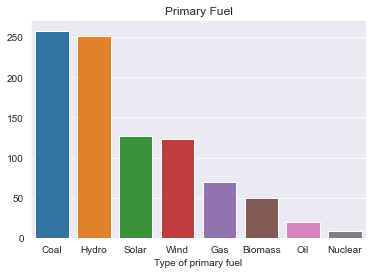

In [130]:
sns.set_style('darkgrid')
sns.barplot(x=df['primary_fuel'].value_counts().index, y = df['primary_fuel'].value_counts().values)
plt.title('Primary Fuel')
plt.xlabel('Type of primary fuel')

In [36]:
df['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

#### We can fill the null values with 'Oil'

Text(0.5, 0, 'Type of other fuel')

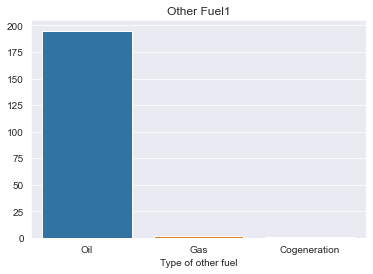

In [131]:
sns.barplot(x=df['other_fuel1'].value_counts().index, y = df['other_fuel1'].value_counts().values)
plt.title('Other Fuel1')
plt.xlabel('Type of other fuel')

In [42]:
df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

#### The data of the capacity of 519 power plants are recorded on the year 2019 and the generation data source are from single origin so we can further drop these two columns

In [54]:
df.drop(['year_of_capacity_data','generation_data_source'], axis =1, inplace = True)

### Data Analysis

In [136]:
df['capacity_mw'].isna().sum()

0

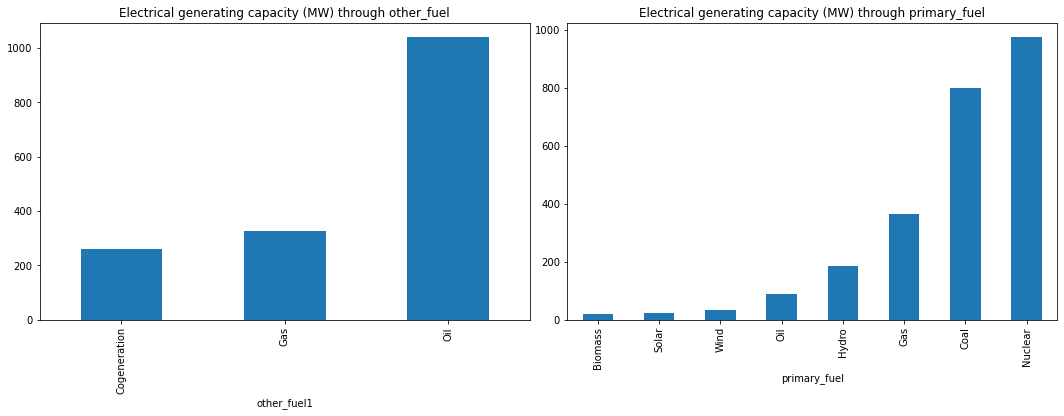

In [76]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Electrical generating capacity (MW) through other_fuel")
df.groupby(["other_fuel1"]).mean()["capacity_mw"].sort_values().plot(kind="bar")
plt.tight_layout(pad=1,h_pad=0.7, w_pad=1.2)
plt.subplot(122)
plt.title("Electrical generating capacity (MW) through primary_fuel")
df.groupby(["primary_fuel"]).mean()["capacity_mw"].sort_values().plot(kind="bar")
plt.tight_layout(pad=1.5, h_pad=0.7, w_pad=0.5)

#### It's evident from the figure that oil has the capability to generate more capacity. Whereas, nuclear plant, coal and gas also have the electrical generating capactiy

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

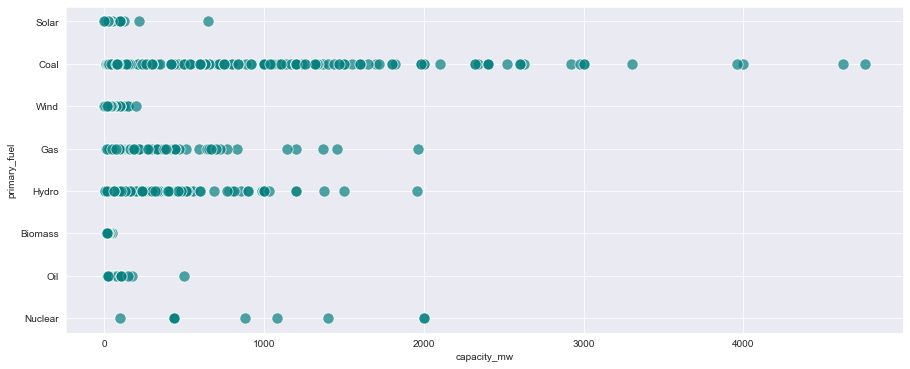

In [209]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df.capacity_mw, y= df.primary_fuel, s=125, alpha=0.7, color = '#08808008')

#### Most of plants are working through coal power whose generating capacity is also tremendous

<AxesSubplot:xlabel='capacity_mw', ylabel='other_fuel1'>

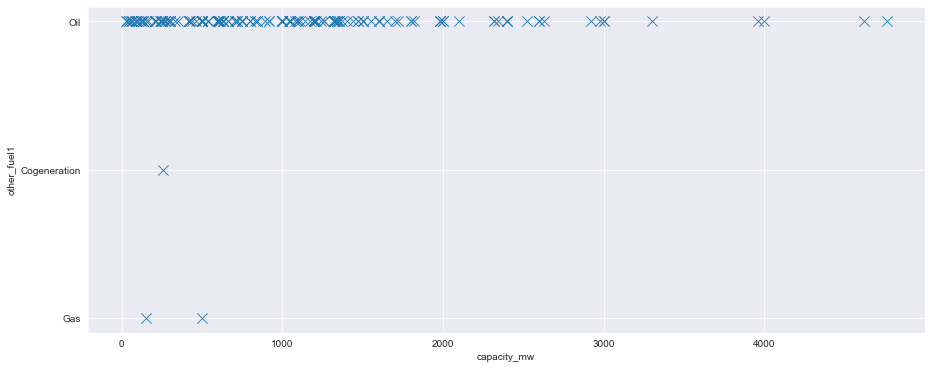

In [169]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df.capacity_mw, y= df.other_fuel1, s=105, marker = 'x', )

#### For the other_fuel1, oil has more generating capacity

In [143]:
df['commissioning_year'].isna().sum()

380

Text(0, 0.5, 'capacity_mw')

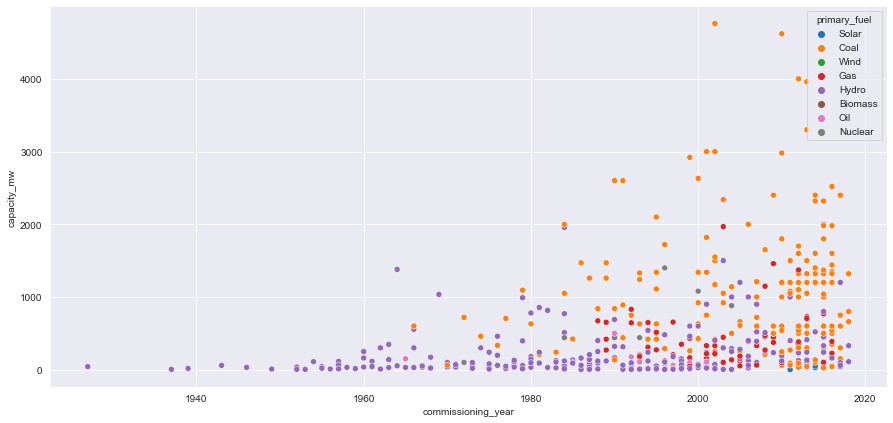

In [179]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='commissioning_year', y='capacity_mw', data=df, hue= 'primary_fuel')
plt.xlabel('commissioning_year')
plt.ylabel('capacity_mw')

#### Hyro fuel as a primary source is been adapted since the early age but its generating capacity has been throughout the years. While coal as a fuel is been adapted in later stage whose generating capacity increased with progression

Text(0, 0.5, 'capacity_mw')

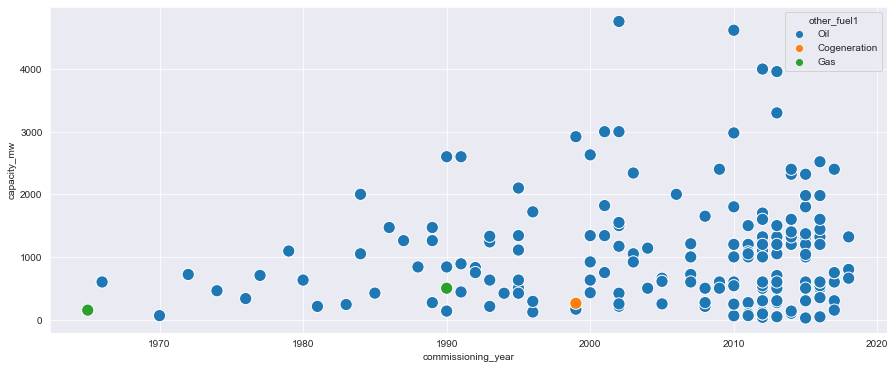

In [167]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='commissioning_year', y='capacity_mw', data=df, hue= 'other_fuel1', s=150)
plt.xlabel('commissioning_year')
plt.ylabel('capacity_mw')

#### Large concentration of oil after the year 2000 and also we could see capacity greater than 3000MW

Text(0, 0.5, 'capacity_mw')

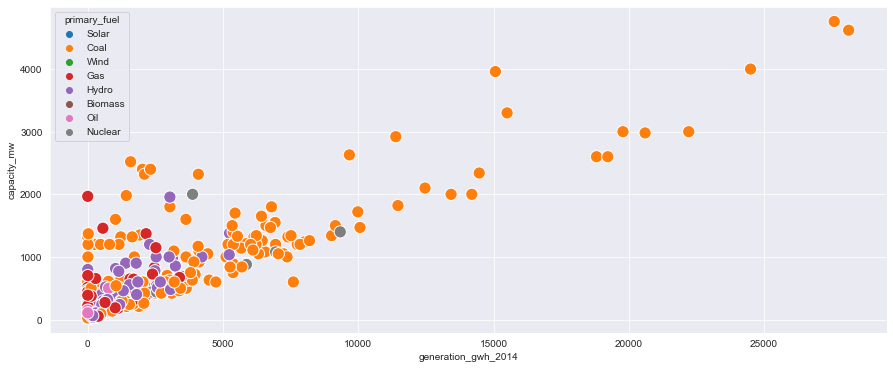

In [214]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='generation_gwh_2014', y='capacity_mw', data=df, hue= 'primary_fuel', s=150)
plt.xlabel('generation_gwh_2014')
plt.ylabel('capacity_mw')

#### It is evident that generation_gwh and capacity have linear relaion and the same can be seen in the graph

Text(0, 0.5, 'capacity_mw')

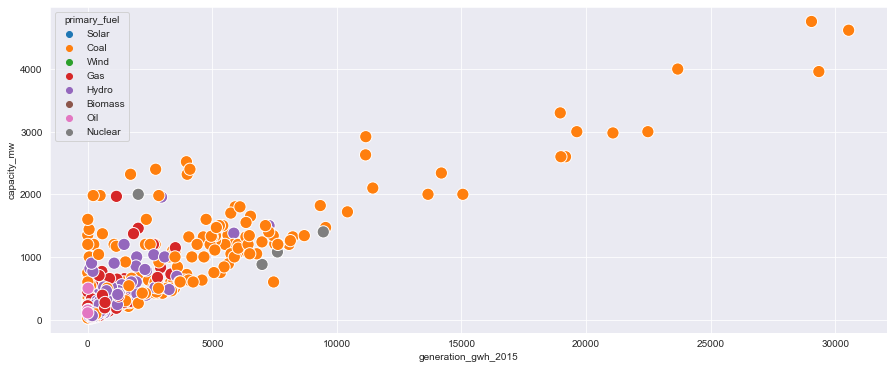

In [180]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='generation_gwh_2015', y='capacity_mw', data=df, hue= 'primary_fuel', s=150)
plt.xlabel('generation_gwh_2015')
plt.ylabel('capacity_mw')

#### Several coal, nuclear and gas powered plants is recoreded to have low generation but have higher capacity. Also the gigawatt(gwh) is comparatively higher than 2014

Text(0, 0.5, 'capacity_mw')

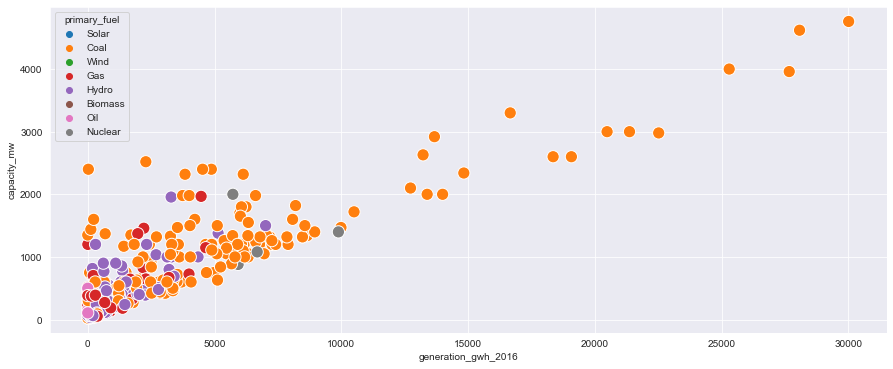

In [215]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw', data=df, hue= 'primary_fuel', s=150)
plt.xlabel('generation_gwh_2016')
plt.ylabel('capacity_mw')

Text(0, 0.5, 'capacity_mw')

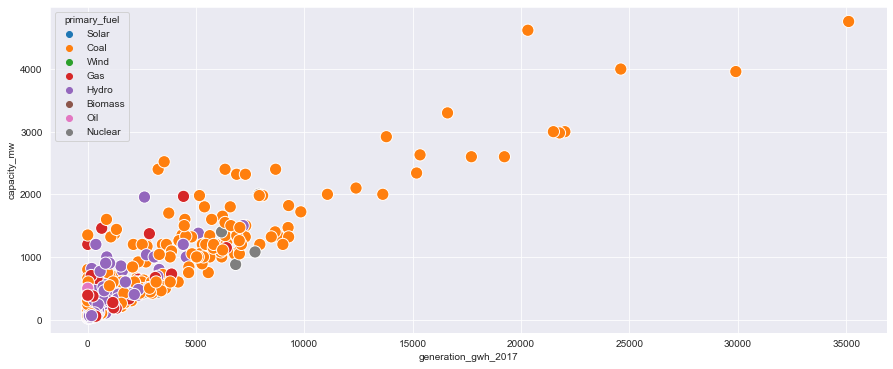

In [175]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw', data=df, hue= 'primary_fuel', s=150)
plt.xlabel('generation_gwh_2017')
plt.ylabel('capacity_mw')

#### Some of the coal power plant are exceeding electric generation above 30000GWH

Text(0, 0.5, 'capacity_mw')

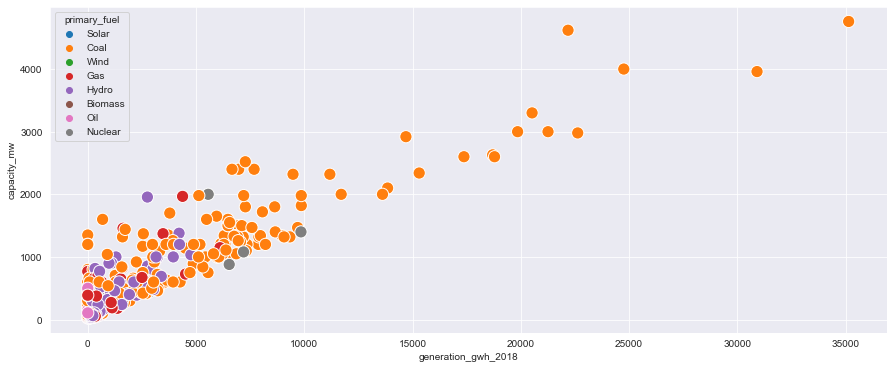

In [178]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw', data=df, hue= 'primary_fuel', s=150)
plt.xlabel('generation_gwh_2018')
plt.ylabel('capacity_mw')

## Descriptive Statistics

In [216]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Oservations:
    1. The Q3 range of capacity_mw has huge difference with minimum @0 and mean @326
    2. The oldest powerplant was first commissioned in 1927 and the latest one in 2018. Almost a decade.
    3. The geospatial location of 46 power plants are missing.
    4. Mean>Median for all generation record year.
    5. Substantial gap between 75% and max for all year generation record.

<AxesSubplot:>

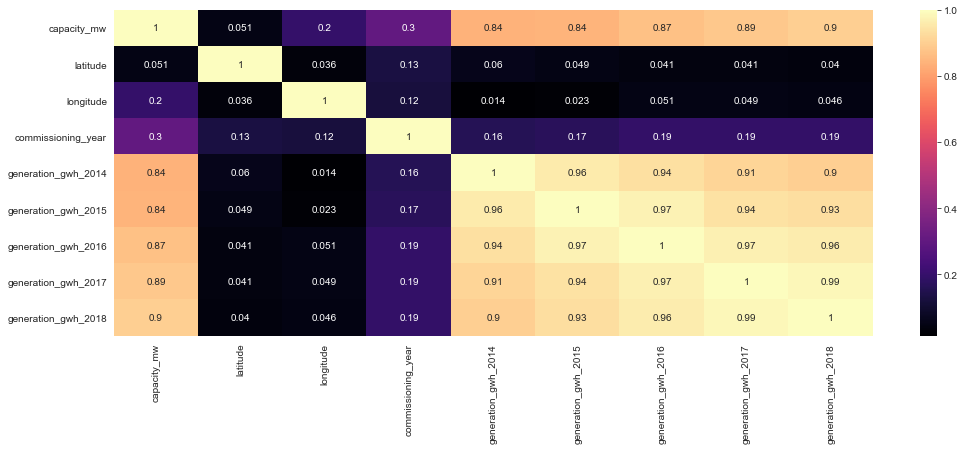

In [217]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

#### Observation:
     As seen in the visual plots earlier, electric generation of plant is linearly related to capacity in MW and as the year progresses the correlation increases. Also the generation recorded data is highly interrelated to each other

In [219]:
    def pplot(df,i):
        plt.figure(figsize=(20,5))
        plt.subplot(1,3,1)
        sns.histplot(x=i,data=df,kde=True)
        plt.subplot(1,3,2)
        sns.regplot(x=i,y='capacity_mw',data=df)
        plt.subplot(1,3,3)
        sns.boxplot(y=i,data=df)
        plt.show()

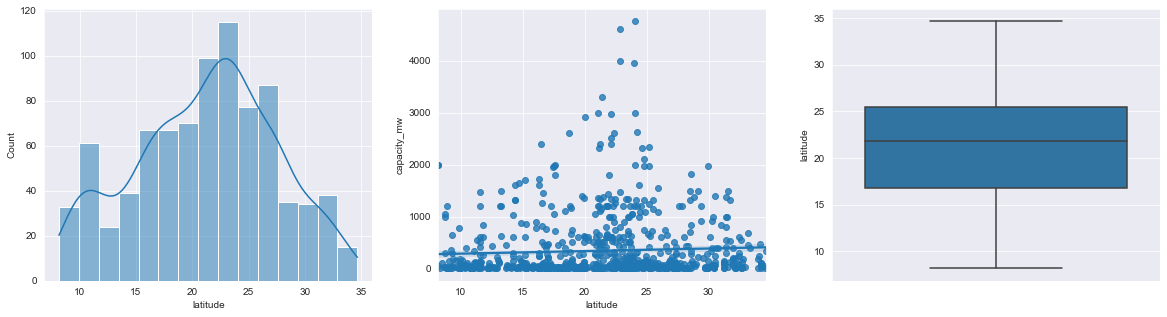

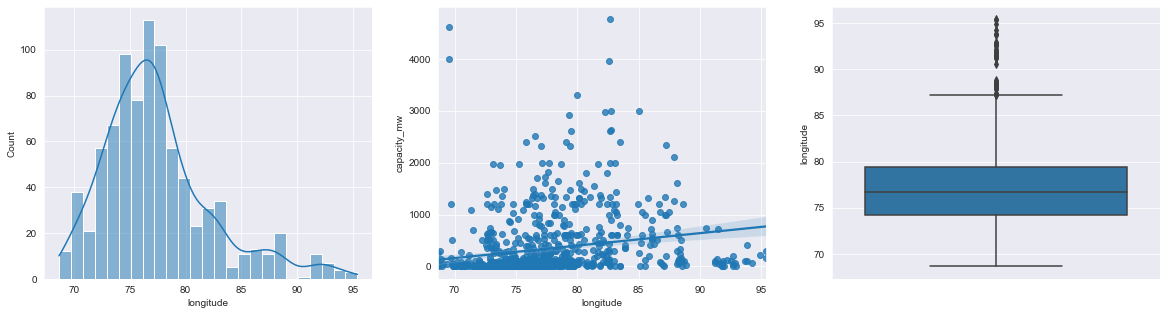

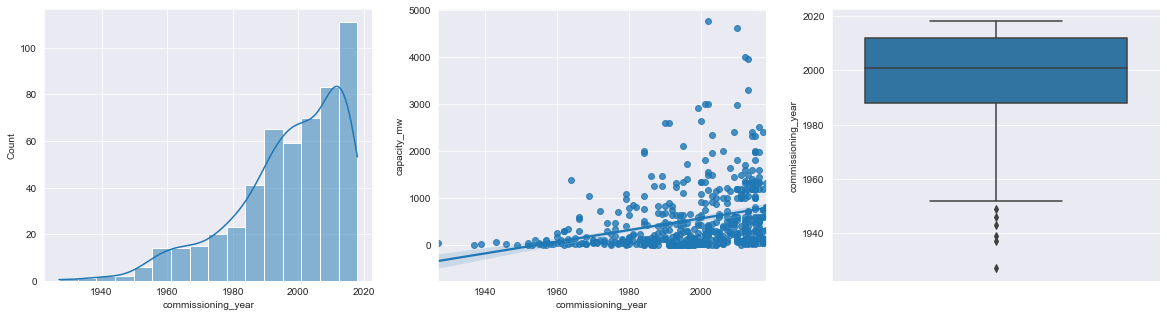

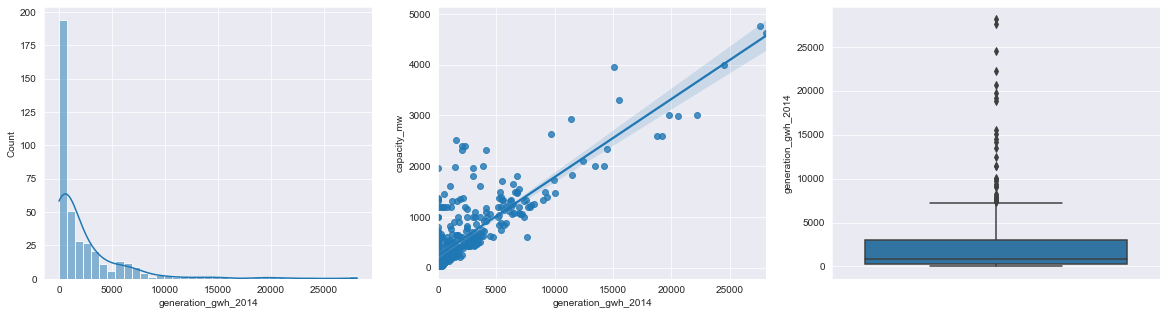

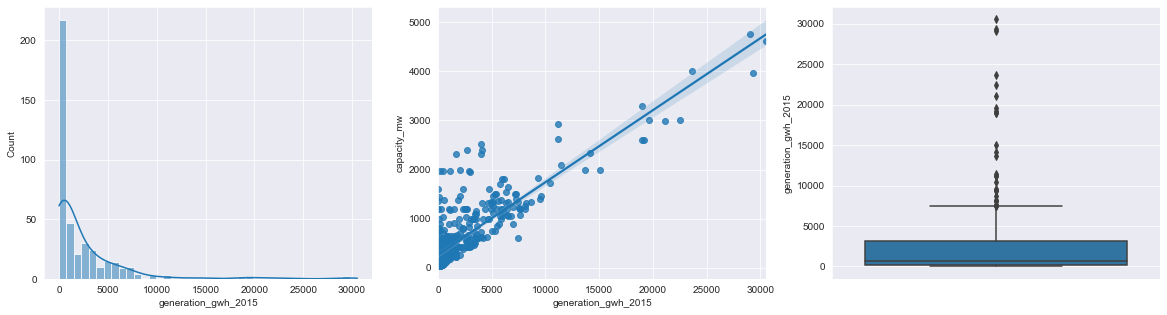

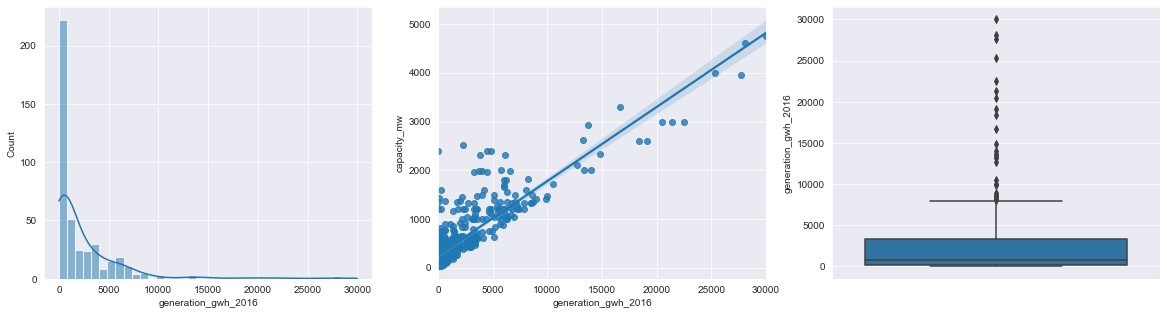

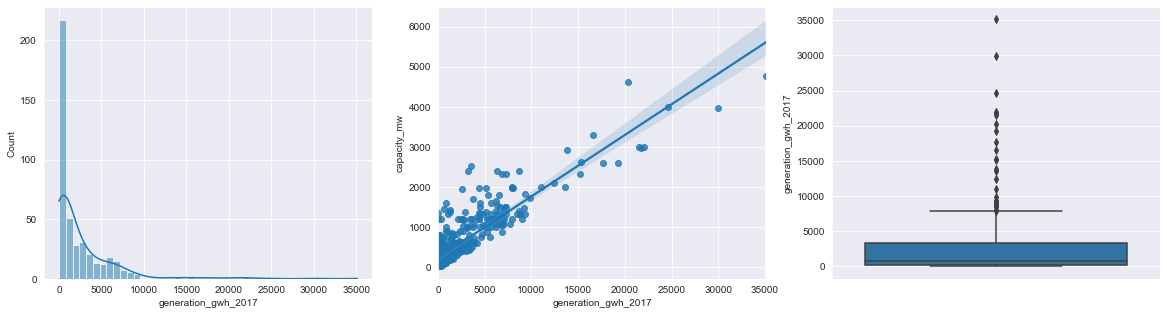

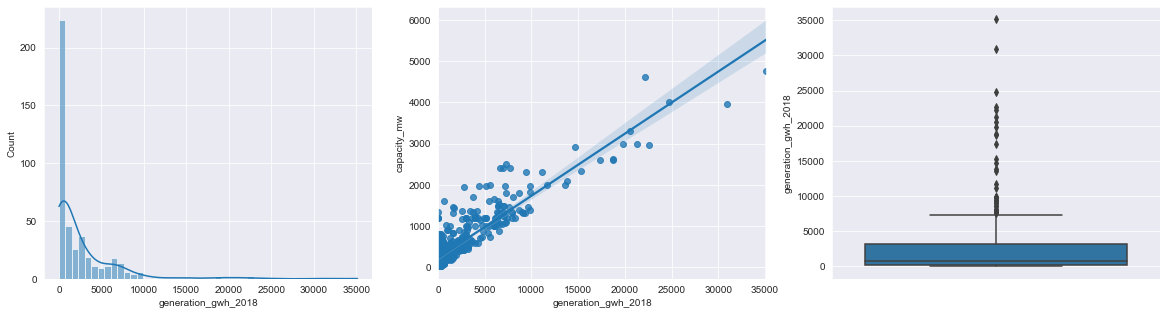

In [226]:
cols = ['latitude', 'longitude', 'commissioning_year', 
        'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018']
for i in cols:
    pplot(df,i)

#### Observation:
    1. The distribution graph of latitude and longitude is somewhat normally distributed but is bimodal and its relation with capacity cannot be defined properly
    2. The graph of commissioning_year is left skewed and there seems to presence of outliers
    3. The distribution graph of all the year is right skewed, have a positive relation plants' capacity and significant number of outliers

## Data Preprocessing

In [137]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'owner', 'source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

#### Filling Null values according to the column characteristics

In [238]:
#filling null values of year 2014-2018 through interpolation
df['generation_gwh_2014'] = df['generation_gwh_2014'].interpolate()

In [244]:
df['generation_gwh_2015'] = df['generation_gwh_2015'].interpolate()

In [245]:
df['generation_gwh_2016'] = df['generation_gwh_2016'].interpolate()

In [246]:
df['generation_gwh_2017'] = df['generation_gwh_2017'].interpolate()

In [247]:
df['generation_gwh_2018'] = df['generation_gwh_2018'].interpolate()

In [306]:
df['latitude'] = df['latitude'].interpolate()
df['longitude'] = df['longitude'].interpolate()

In [343]:
df['commissioning_year'] = df['commissioning_year'].interpolate()

#### Commissioning_year of plants whose source is CDM and primary_fuel is 'Wind' is not available(124 data missing)

#### we need to drop 'other fuel1' since it has most of the NaN values. Along with it we will remove name since it does not help in prediction. At the same time, we will keep owner and name columns becuase a certain degree of cross verification can be done internally by the algorithm to check for target variable

In [352]:
df.drop(['other_fuel1', 'name'], axis =1, inplace = True)

In [357]:
#Dropping the remaining 3 null values along the rows
df.dropna(subset = ['generation_gwh_2014'], inplace = True)

### Label Encoding

In [353]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [365]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [363]:
#Encoding columns to categorical features
df['primary_fuel'] = le.fit_transform(df['primary_fuel'])
df['owner'] = le.fit_transform(df['owner'])
df['source'] = le.fit_transform(df['source'])
df['commissioning_year'] = 2022 - df['commissioning_year']

### Splitting the dataset

In [366]:
X_fuel = df.drop(['primary_fuel'], axis = 1)
Y_fuel = df['primary_fuel']

### StandardScaler

In [364]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [369]:
x_fuel = scale.fit_transform(X_fuel)

### Train_test_split

In [370]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_fuel, Y_fuel, test_size=0.25, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((678, 11), (226, 11), (678,), (226,))

## Model Training

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

In [379]:
log_reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x_fuel, Y_fuel, test_size=0.25, random_state=42)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,y_pred))

cv_score = cross_val_score(log_reg, x_fuel, Y_fuel, scoring='accuracy',cv=5)
print('CV Score:', np.mean(cv_score))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score 0.6283185840707964
CV Score: 0.6414978514426029
[[ 6  1  0  0  0  0  2  0]
 [ 3 47  0  8  0  0  7  1]
 [ 1  6  0 10  0  0  2  2]
 [ 0 10  0 47  0  0  0  8]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 3  6  0  0  0  0 22  0]
 [ 2  1  0  2  0  0  0 20]]
              precision    recall  f1-score   support

           0       0.40      0.67      0.50         9
           1       0.64      0.71      0.68        66
           2       0.00      0.00      0.00        21
           3       0.64      0.72      0.68        65
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.65      0.71      0.68        31
           7       0.65      0.80      0.71        25

    accuracy                           0.63       226
   macro avg       0.37      0.45      0.41       226
weighted avg       0.55      0.63      0.59       226



In [390]:
def cv_score(model):
    x_train, x_test, y_train, y_test = train_test_split(x_fuel, Y_fuel, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Accuracy on training set: ', model.score(x_train, y_train))
    print('Accuracy on validation set: ', accuracy_score(y_test,y_pred))
    
    score = cross_val_score(model,x_fuel, Y_fuel)
    print('CV score: ', np.mean(score))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

### Decision Tree Classifier

In [380]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_para = {'criterion': ['gini','entropy'], 
            'splitter':['best','random'],
            'max_depth': [10,20,30,40,50],
            'min_samples_split': [2,4,6,8,10],
            }
dtc_tuning = GridSearchCV(estimator = dtc, param_grid = dtc_para, cv=5, scoring='accuracy',)

dtc_tuning.fit(x_fuel, Y_fuel)
print(dtc_tuning.best_params_)
print(dtc_tuning.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'splitter': 'best'}
0.7897912829957028


In [391]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, min_samples_split = 4, splitter = 'best')
cv_score(dtc)

Accuracy on training set:  0.9734513274336283
Accuracy on validation set:  0.7300884955752213
CV score:  0.7820564763658686
[[ 5  2  0  0  0  0  2  0]
 [ 3 49  3  4  0  4  3  0]
 [ 0  9  9  1  0  2  0  0]
 [ 0 11  2 49  0  3  0  0]
 [ 0  2  1  1  0  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 4  3  0  0  0  0 24  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.64      0.74      0.69        66
           2       0.56      0.43      0.49        21
           3       0.89      0.75      0.82        65
           4       0.00      0.00      0.00         4
           5       0.31      0.80      0.44         5
           6       0.83      0.77      0.80        31
           7       1.00      1.00      1.00        25

    accuracy                           0.73       226
   macro avg       0.58      0.63      0.59       226
weighted avg       0.74      0.73      0.73       226



### KNeighbors Classifier

In [394]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_para = {'n_neighbors': list(range(1,10)),
            'weights': ['uniform','distance'],
            'algorithm': ['auto','ball_tree','kd_tree','brute'],
            'metric':['euclidean','minkowski']}
knn_tuning = GridSearchCV(estimator = knn, param_grid = knn_para, cv=5, scoring = 'accuracy')
knn_tuning.fit(x_fuel, Y_fuel)
print(knn_tuning.best_params_)
print(knn_tuning.best_score_)

{'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.7068262737875998


In [395]:
knn = KNeighborsClassifier(n_neighbors = 4, algorithm = 'auto', metric = 'euclidean', weights = 'distance')
cv_score(knn)

Accuracy on training set:  1.0
Accuracy on validation set:  0.7389380530973452
CV score:  0.7068262737875998
[[ 5  2  0  0  0  0  1  1]
 [ 5 49  3  3  0  0  3  3]
 [ 1  4 11  3  0  0  1  1]
 [ 0  4  0 59  0  0  0  2]
 [ 0  2  2  0  0  0  0  0]
 [ 1  0  1  3  0  0  0  0]
 [ 3  3  0  0  0  0 24  1]
 [ 1  2  0  2  0  0  1 19]]
              precision    recall  f1-score   support

           0       0.31      0.56      0.40         9
           1       0.74      0.74      0.74        66
           2       0.65      0.52      0.58        21
           3       0.84      0.91      0.87        65
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.80      0.77      0.79        31
           7       0.70      0.76      0.73        25

    accuracy                           0.74       226
   macro avg       0.51      0.53      0.51       226
weighted avg       0.72      0.74      0.73       226



### Random Forest Classifier

In [396]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_para = {'n_estimators':[100,125,150,200,250],
            'criterion': ['gini','entropy'],
           'max_features': ['auto','sqrt','log2']}
rfc_tuning = GridSearchCV(estimator = rfc, param_grid = rfc_para, cv = 10,scoring = 'accuracy')
rfc_tuning.fit(x_fuel, Y_fuel)
print(rfc_tuning.best_params_)
print(rfc_tuning.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}
0.8230036630036629


In [397]:
rfc = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', max_features = 'sqrt')
cv_score(rfc)

Accuracy on training set:  1.0
Accuracy on validation set:  0.8230088495575221
CV score:  0.8042050337630448
[[ 8  0  0  0  0  0  1  0]
 [ 3 55  2  2  0  2  2  0]
 [ 0  8  6  5  0  0  1  1]
 [ 0  4  0 61  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 1  3  0  0  0  0 27  0]
 [ 0  0  0  0  0  0  0 25]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.75      0.83      0.79        66
           2       0.67      0.29      0.40        21
           3       0.88      0.94      0.91        65
           4       0.00      0.00      0.00         4
           5       0.67      0.80      0.73         5
           6       0.87      0.87      0.87        31
           7       0.96      1.00      0.98        25

    accuracy                           0.82       226
   macro avg       0.68      0.70      0.68       226
weighted avg       0.80      0.82      0.80       226



### SGD Classifier

In [399]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd_para = {'alpha': [1,1e-01,1e-02,1e-03,1e-04,1e-05],
            'penalty':['l2','l1'],
            'learning_rate': ['optimal','constant','invscaling']}
sgd_tuning = GridSearchCV( sgd, sgd_para, cv=5, scoring = 'accuracy')
sgd_tuning.fit(x_fuel, Y_fuel)
print(sgd_tuning.best_params_)
print(sgd_tuning.best_score_)

{'alpha': 0.01, 'learning_rate': 'optimal', 'penalty': 'l2'}
0.6337875997544506


In [400]:
sgd = SGDClassifier(alpha = 0.01, penalty = 'l2', learning_rate = 'optimal')
cv_score(sgd)

Accuracy on training set:  0.6489675516224189
Accuracy on validation set:  0.6106194690265486
CV score:  0.6171945979128299
[[ 6  0  1  0  0  0  2  0]
 [ 5 44  2  9  0  0  6  0]
 [ 1 11  0  6  0  0  2  1]
 [ 0  9  1 54  0  0  0  1]
 [ 0  2  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 3  4  1  0  0  0 22  1]
 [ 3  2  2  5  0  0  1 12]]
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         9
           1       0.61      0.67      0.64        66
           2       0.00      0.00      0.00        21
           3       0.68      0.83      0.74        65
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.65      0.71      0.68        31
           7       0.80      0.48      0.60        25

    accuracy                           0.61       226
   macro avg       0.38      0.42      0.39       226
weighted avg       0.56      0.61      0.58       226



### AdaBoost Classifier

In [401]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada_para = {'n_estimators': [100,125,150,175],
            'learning_rate': [1,1.5,2,2.5],
            'random_state': [40,50,60]}
ada_tuning = GridSearchCV(ada, ada_para, cv=5, scoring = 'accuracy')
ada_tuning.fit(x_fuel, Y_fuel)
print(ada_tuning.best_params_)
print(ada_tuning.best_score_)

{'learning_rate': 2, 'n_estimators': 150, 'random_state': 60}
0.5828360957642726


In [402]:
ada = AdaBoostClassifier(n_estimators = 150, learning_rate = 1, random_state = 60)
cv_score(ada)

Accuracy on training set:  0.4144542772861357
Accuracy on validation set:  0.4247787610619469
CV score:  0.4369244935543278
[[ 0  0  0  0  0  0  9  0]
 [ 0  0  0 48  0  0 18  0]
 [ 0  0  0 17  0  0  4  0]
 [ 0  0  0 65  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0 10  0  0  0  0 15  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        21
           3       0.47      1.00      0.64        65
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.40      1.00      0.57        31
           7       0.00      0.00      0.00        25

    accuracy                           0.42       226
   macro avg       0.11      0.25      0.15       226
weighted avg       0.19      0.42      0.26       226



### Bernoulli NB

In [392]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_para = {'alpha':[3.0,2.5,2.0,1.5,1.4,1.3,1.3,1.2,1.1,1.0,0.1],
            'fit_prior':[True,False]}
bnb_tuning = GridSearchCV(estimator = bnb, param_grid = bnb_para,cv=5, scoring = 'accuracy', error_score = 'raise')

bnb_tuning.fit(x_fuel, Y_fuel)
print(bnb_tuning.best_params_)
print(bnb_tuning.best_score_)

{'alpha': 1.5, 'fit_prior': True}
0.5496623695518723


In [393]:
bnb = BernoulliNB(alpha = 1.5, fit_prior = True)
cv_score(bnb)

Accuracy on training set:  0.5722713864306784
Accuracy on validation set:  0.5929203539823009
CV score:  0.5496623695518723
[[ 4  0  0  0  0  2  2  1]
 [ 6 37  2 11  0  2  5  3]
 [ 2  4  2 11  0  0  1  1]
 [ 0 10  0 55  0  0  0  0]
 [ 0  3  0  1  0  0  0  0]
 [ 1  0  0  4  0  0  0  0]
 [ 3  2  0  0  0  0 25  1]
 [ 0  3  0 10  0  0  1 11]]
              precision    recall  f1-score   support

           0       0.25      0.44      0.32         9
           1       0.63      0.56      0.59        66
           2       0.50      0.10      0.16        21
           3       0.60      0.85      0.70        65
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         5
           6       0.74      0.81      0.77        31
           7       0.65      0.44      0.52        25

    accuracy                           0.59       226
   macro avg       0.42      0.40      0.38       226
weighted avg       0.58      0.59      0.57       226



#### We can consider the RandomForest Classifier as the best even though in reality, its accuracy will be still lower than what it is displayed.

## Saving the Model

In [410]:
import pickle
save_file = 'GPPD.pkl'
pickle.dump(rfc, open(save_file, 'wb'))